In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import time  

data= pd.read_excel("CLL788_A1/q1.xlsx")

data.head()   

,"Population in 10,000's",Profit In Lakhs(Rs)
0,6.2101,17.6920
1,5.6277,9.2302
2,8.6186,13.7620
3,7.1032,11.9540
4,5.9598,6.9233


In [2]:
data.insert(loc=0, column='intercept', value=1.0)

In [3]:
d=data.to_numpy()

In [4]:
X=d[:,0:2]
Y=d[:,-1]

In [35]:
#Batch LMS GRADIENT DESCENT
start_time = time.time()
alpha = 0.001 
tol=1e-4
m = Y.size 
theta = np.array([np.random.random(1)[0],np.random.random(1)[0]])
cost=0
prev_cost=99999
cost_hist=[]
while(abs(cost-prev_cost)>tol):
    pred = X.dot(theta)
    prev_cost = np.sum((X.dot(theta)-Y)**2)/(2*m)
    theta = theta - alpha*(X.T.dot(pred-Y))/m
    cost = np.sum((X.dot(theta)-Y)**2)/(2*m)
    cost_hist.append(cost)
print("Convergence Time:", (time.time() - start_time)) 
print("Theta:", theta)
print("No. of iterations to converge: ", len(cost_hist))

Convergence Time: 0.08694052696228027
Theta: [-2.1349679   1.01560453]
No. of iterations to converge:  4561


In [36]:
#Calculating accuracy
y_pred=X.dot(theta)
MSE=np.mean((Y-y_pred)**2)
print("Mean Square Error: ", MSE)

Mean Square Error:  9.519508296356147


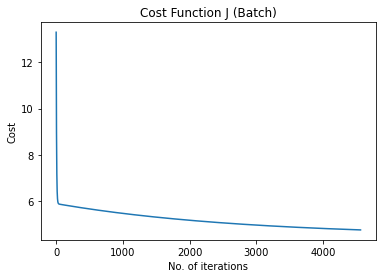

In [37]:
plt.title('Cost Function J (Batch)')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(cost_hist)
plt.show()

In [38]:
#Stochastic LMS GRADIENT DESCENT
start_time = time.time()
alpha = 0.001 
tol=1e-4
m = Y.size 
theta = np.array([np.random.random(1)[0],np.random.random(1)[0]])
cost=0
prev_cost=99999
cost_hist=[]
while(abs(cost-prev_cost)>tol):
    prev_cost = np.sum((X.dot(theta)-Y)**2)/2/m
    for i in range(m):
        pred = X[i].dot(theta)
        theta = theta - alpha*(X[i].T.dot(pred-Y[i]))
    cost = np.sum((X.dot(theta)-Y)**2)/2/m
    #print(prev_cost, cost)
    cost_hist.append(cost)
print("Convergence Time:", (time.time() - start_time)) 
print("Theta:", theta)
print("No. of iterations to converge: ", len(cost_hist))    

Convergence Time: 0.09822201728820801
Theta: [-3.80030889  1.01762938]
No. of iterations to converge:  309


In [33]:
theta

array([-3.80019117,  1.01761601])

In [34]:
#Calculating accuracy
y_pred=X.dot(theta)
MSE=np.mean((Y-y_pred)**2)
print("Mean Square Error: ", MSE)

Mean Square Error:  11.189636832591258


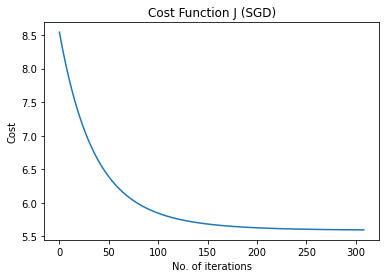

In [39]:
plt.title('Cost Function J (SGD)')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(cost_hist)
plt.show()

In [40]:
def random_mini_batches(X,Y, minibatch_size):
    
    m = Y.size          
    
    permutation = list(np.random.permutation(m))            
    shuffled_X = X[permutation,:]
    shuffled_Y = Y[permutation]
    
    minibatches = []                                        
    number_of_minibatches = int(m/minibatch_size)            
    
    for k in range(number_of_minibatches):
        minibatch_X = shuffled_X[k*minibatch_size: (k+1)*minibatch_size,: ]
        minibatch_Y = shuffled_Y[k*minibatch_size: (k+1)*minibatch_size ]
        minibatch_pair = (minibatch_X , minibatch_Y)                        
        minibatches.append(minibatch_pair)
    if m%minibatch_size != 0 :
        last_minibatch_X = shuffled_X[(k+1)*minibatch_size: m,: ]
        last_minibatch_Y = shuffled_Y[(k+1)*minibatch_size: m]
        last_minibatch_pair = (last_minibatch_X , last_minibatch_Y)
        minibatches.append(last_minibatch_pair)
    return minibatches

In [53]:
#Mini Batch LMS GRADIENT DESCENT
start_time = time.time()
alpha = 0.001 
tol=1e-4
m = Y.size 
theta = np.array([np.random.random(1)[0],np.random.random(1)[0]])
cost=0
prev_cost=99999
cost_hist=[]
while(abs(cost-prev_cost)>tol):
    prev_cost = np.sum((X.dot(theta)-Y)**2)/2/m
    mini_batches = random_mini_batches(X, Y, 4)
    for mini_batch in mini_batches:
        X_mini, Y_mini = mini_batch
        pred = X_mini.dot(theta)
        theta = theta - alpha*(X_mini.T.dot(pred-Y_mini))
    cost = np.sum((X.dot(theta)-Y)**2)/2/m
    #print(prev_cost, cost)
    cost_hist.append(cost)
print("Convergence Time:", (time.time() - start_time)) 
print("Theta:", theta)
print("No. of iterations to converge: ", len(cost_hist))     

Convergence Time: 0.18363738059997559
Theta: [-3.93246316  1.19570523]
No. of iterations to converge:  1227


In [54]:
theta

array([-3.93246316,  1.19570523])

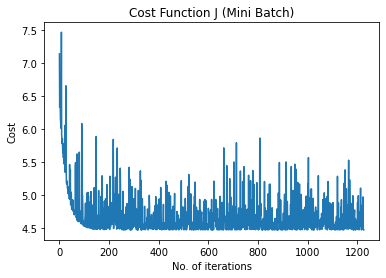

In [55]:
plt.title('Cost Function J (Mini Batch)')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(cost_hist)
plt.show()

In [56]:
#Calculating accuracy
y_pred=X.dot(theta)
MSE=np.mean((Y-y_pred)**2)
print("Mean Square Error: ", MSE)

Mean Square Error:  8.954070515787446


In [57]:
#Least Square Closed Form 
theta=(np.linalg.inv(X.T.dot(X)).dot(X.T)).dot(Y)

In [59]:
print("Theta: ", theta)

Theta:  [-3.91508424  1.19303364]


In [58]:
y_pred=X.dot(theta)
MSE=np.mean((Y-y_pred)**2)
print("Mean Square Error: ", MSE)

Mean Square Error:  8.953942751950358


# Q2 b

In [60]:
M=4
W = []
Bandwidth=0.5
query_point=7.576
for i in range(M):
    xi = X[:,1][i]
    denominator = (-2 * Bandwidth * Bandwidth)
    W.append(np.exp(np.dot((xi-query_point), (xi-query_point).T)/denominator))

In [61]:
W=np.asarray(W)

In [62]:
#Locally Weighted Regression
alpha = 0.001 
m = 4
x=X[0:4,:]
y=Y[0:4]
theta = np.array([np.random.random(1)[0],np.random.random(1)[0]])
cost=0
cost_hist=[]
# print(x)
for j in range(4):
    for i in range(m):
        pred = x[i].dot(theta)
        theta = theta - alpha*(W[i]*(x[i].T.dot(pred-y[i])))
    cost= W.T.dot(X[0:4,:].dot(theta)-Y[0:4])**2/(2*m)
    cost_hist.append(cost)

In [63]:
print("Theta:", theta)

Theta: [0.71349679 0.41111413]


In [64]:
cost_hist

[7.362915897411117, 6.759007559107173, 6.204754994354164, 5.696070153918476]

In [65]:
W

array([2.39600931e-02, 5.04599365e-04, 1.13718462e-01, 6.39492951e-01])

In [68]:
Query=[1, query_point]
Query=np.asarray(Query)
print("Prediction: ", Query.dot(theta))

Prediction:  3.828097461610978


# Q2 c

In [69]:
x=np.expand_dims(X[:,-1], axis=1)
y=np.expand_dims(Y, axis=1)

In [70]:
x.shape

(97, 1)

In [71]:
from sklearn.linear_model import Ridge

ridgeR = Ridge(alpha = 1)
ridgeR.fit(x,y)
y_pred = ridgeR.predict(x)
 
# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - Y)**2)
print(mean_squared_error_ridge)

51.116680052500485


In [72]:
from sklearn.linear_model import Lasso

Lass = Lasso(alpha = 1)
Lass.fit(x,y)
y_pred = Lass.predict(x)
 
# calculate mean square error
mean_squared_error_lasso= np.mean((y_pred - Y)**2)
print(mean_squared_error_lasso)

9.021411820230476


In [73]:
from sklearn.linear_model import ElasticNet

Enet = ElasticNet(alpha = 1)
Enet.fit(x,y)
y_pred = Enet.predict(x)
 
# calculate mean square error
mean_squared_error_elasticnet = np.mean((y_pred - Y)**2)
print(mean_squared_error_elasticnet)

9.029855945191517
